# Speed difference between reading numerical data from plain CSV vs. using _.npy_ file format
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

In [1]:
import numpy as np
import time

### Number of samples

In [2]:
n_samples=1000000

### Reading from a CSV

In [3]:
with open('fdata.txt', 'w') as fdata:
    for _ in range(n_samples):
        fdata.write(str(10*np.random.random())+',')

In [4]:
t1=time.time()
array_direct = np.fromfile('fdata.txt',dtype=float, count=-1,sep=',').reshape(1000,1000)
t2=time.time()
print(array_direct)
print('\nShape: ',array_direct.shape)
print(f"Time took to read: {t2-t1} seconds.")

[[7.67663682 6.91430604 2.78991408 ... 3.62465202 4.53586433 0.3469955 ]
 [8.75533503 0.85541715 9.40026384 ... 0.62124578 1.58790766 1.00792037]
 [5.62908327 9.02346211 6.22968559 ... 5.32863264 4.3689387  2.87109527]
 ...
 [1.0271672  0.24443594 0.22606608 ... 8.7713719  0.83629601 0.79679674]
 [5.0607254  4.47325329 6.21957644 ... 4.19126821 1.39512349 2.55633918]
 [8.60567288 3.76895566 5.01759886 ... 0.5770266  7.21258652 8.26645912]]

Shape:  (1000, 1000)
Time took to read: 0.4674568176269531 seconds.


In [5]:
t1=time.time()
with open('fdata.txt','r') as fdata:
    datastr=fdata.read()
lst = datastr.split(',')
lst.pop()
array_lst=np.array(lst,dtype=float).reshape(1000,1000)
t2=time.time()
print(array_lst)
print('\nShape: ',array_lst.shape)
print(f"Time took to read: {t2-t1} seconds.")

[[7.67663682 6.91430604 2.78991408 ... 3.62465202 4.53586433 0.3469955 ]
 [8.75533503 0.85541715 9.40026384 ... 0.62124578 1.58790766 1.00792037]
 [5.62908327 9.02346211 6.22968559 ... 5.32863264 4.3689387  2.87109527]
 ...
 [1.0271672  0.24443594 0.22606608 ... 8.7713719  0.83629601 0.79679674]
 [5.0607254  4.47325329 6.21957644 ... 4.19126821 1.39512349 2.55633918]
 [8.60567288 3.76895566 5.01759886 ... 0.5770266  7.21258652 8.26645912]]

Shape:  (1000, 1000)
Time took to read: 0.30719637870788574 seconds.


### Save as a .npy file and read

In [6]:
np.save('fnumpy.npy',array_lst)

In [7]:
t1=time.time()
array_reloaded = np.load('fnumpy.npy')
t2=time.time()
print(array_reloaded)
print('\nShape: ',array_reloaded.shape)
print(f"Time took to load: {t2-t1} seconds.")

[[7.67663682 6.91430604 2.78991408 ... 3.62465202 4.53586433 0.3469955 ]
 [8.75533503 0.85541715 9.40026384 ... 0.62124578 1.58790766 1.00792037]
 [5.62908327 9.02346211 6.22968559 ... 5.32863264 4.3689387  2.87109527]
 ...
 [1.0271672  0.24443594 0.22606608 ... 8.7713719  0.83629601 0.79679674]
 [5.0607254  4.47325329 6.21957644 ... 4.19126821 1.39512349 2.55633918]
 [8.60567288 3.76895566 5.01759886 ... 0.5770266  7.21258652 8.26645912]]

Shape:  (1000, 1000)
Time took to load: 0.0027103424072265625 seconds.


In [8]:
t1=time.time()
array_reloaded = np.load('fnumpy.npy').reshape(10000,100)
t2=time.time()
print(array_reloaded)
print('\nShape: ',array_reloaded.shape)
print(f"Time took to load: {t2-t1} seconds.")

[[7.67663682 6.91430604 2.78991408 ... 2.97583343 6.3915633  7.91121184]
 [9.90027929 2.62112065 3.86208952 ... 5.57314874 6.77801606 0.2206387 ]
 [8.9271368  4.3441689  0.42092245 ... 5.98379283 3.47232605 3.90477228]
 ...
 [0.3577778  9.28045104 0.46790284 ... 6.91979245 1.94833894 9.8640072 ]
 [2.88225242 7.67727695 4.29009953 ... 4.19715892 2.09417159 9.09408485]
 [4.21405798 9.95486018 0.28039888 ... 0.5770266  7.21258652 8.26645912]]

Shape:  (10000, 100)
Time took to load: 0.0028467178344726562 seconds.


### Speed enhancement as the sample size grows...

In [9]:
n_samples=[100000*i for i in range(1,11)] 
time_lst_read=[]
time_npy_read=[]

for sample_size in n_samples:
    with open('fdata.txt', 'w') as fdata:
        for _ in range(sample_size):
            fdata.write(str(10*np.random.random())+',')

    t1=time.time()
    with open('fdata.txt','r') as fdata:
        datastr=fdata.read()
    lst = datastr.split(',')
    lst.pop()
    array_lst=np.array(lst,dtype=float)
    t2=time.time()
    time_lst_read.append(1000*(t2-t1))
    print("Array shape:",array_lst.shape)

    np.save('fnumpy.npy',array_lst)

    t1=time.time()
    array_reloaded = np.load('fnumpy.npy')
    t2=time.time()
    time_npy_read.append(1000*(t2-t1))
    print("Array shape:",array_reloaded.shape)
    
    print(f"Processing done for {sample_size} samples\n")

Array shape: (100000,)
Array shape: (100000,)
Processing done for 100000 samples

Array shape: (200000,)
Array shape: (200000,)
Processing done for 200000 samples

Array shape: (300000,)
Array shape: (300000,)
Processing done for 300000 samples

Array shape: (400000,)
Array shape: (400000,)
Processing done for 400000 samples

Array shape: (500000,)
Array shape: (500000,)
Processing done for 500000 samples

Array shape: (600000,)
Array shape: (600000,)
Processing done for 600000 samples

Array shape: (700000,)
Array shape: (700000,)
Processing done for 700000 samples

Array shape: (800000,)
Array shape: (800000,)
Processing done for 800000 samples

Array shape: (900000,)
Array shape: (900000,)
Processing done for 900000 samples

Array shape: (1000000,)
Array shape: (1000000,)
Processing done for 1000000 samples



In [10]:
import matplotlib.pyplot as plt

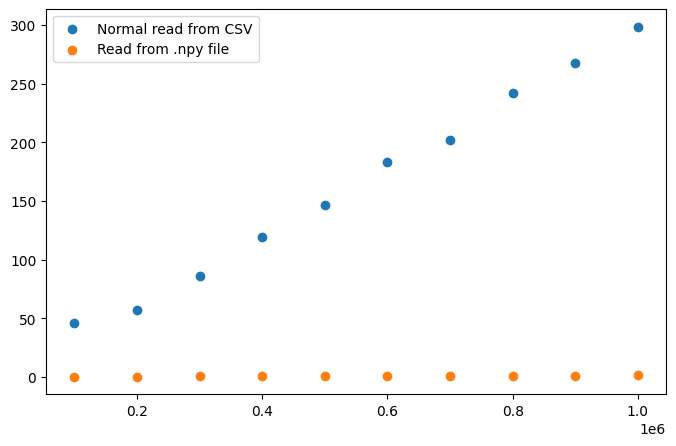

In [11]:
plt.figure(figsize=(8,5))
#plt.xscale('log')
#plt.yscale('log')
plt.scatter(n_samples,time_lst_read)
plt.scatter(n_samples,time_npy_read)
plt.legend(['Normal read from CSV','Read from .npy file'])
plt.show()